<a href="https://www.kaggle.com/code/mohammedmohsen0404/proj30-daily-climate-time-series?scriptVersionId=194461415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

---
**<center><h1>Daily Climate time series</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

This project aims to leverage a comprehensive dataset of weather parameters collected over four years in Delhi, India, to build and refine predictive models for weather forecasting. The goal is to utilize historical weather data to accurately predict future conditions using Conv1D, aiding in both academic research and practical applications related to climate analysis in the Indian context.

# **Import Libraries and Data**
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data
!unzip daily-climate-time-series-data.zip

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0%|                                               | 0.00/22.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 22.0k/22.0k [00:00<00:00, 28.5MB/s]
Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [5]:
df_test = pd.read_csv("DailyDelhiClimateTest.csv").copy()
df_train = pd.read_csv("DailyDelhiClimateTrain.csv").copy()

# **Take a look at the data**
---

In [6]:
print(df_train.shape)
print(df_test.shape)

(1462, 5)
(114, 5)


In [7]:
df_train.head(10)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
5,2013-01-06,7.000000,82.800000,1.480000,1018.000000
6,2013-01-07,7.000000,78.600000,6.300000,1020.000000
7,2013-01-08,8.857143,63.714286,7.142857,1018.714286
8,2013-01-09,14.000000,51.250000,12.500000,1017.000000
9,2013-01-10,11.000000,62.000000,7.400000,1015.666667


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [9]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


# **Data Preparing**
---

**Formatting**

In [10]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

**Indexing**

In [11]:
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)

In [12]:
df_train = df_train.sort_index()
df_test = df_test.sort_index()

In [13]:
df_train.head(5)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


**Handling Missing Data**

In [14]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
meantemp,0,0.0
humidity,0,0.0
wind_speed,0,0.0
meanpressure,0,0.0


In [15]:
total = df_train.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Exploratory Data Analysis**
---

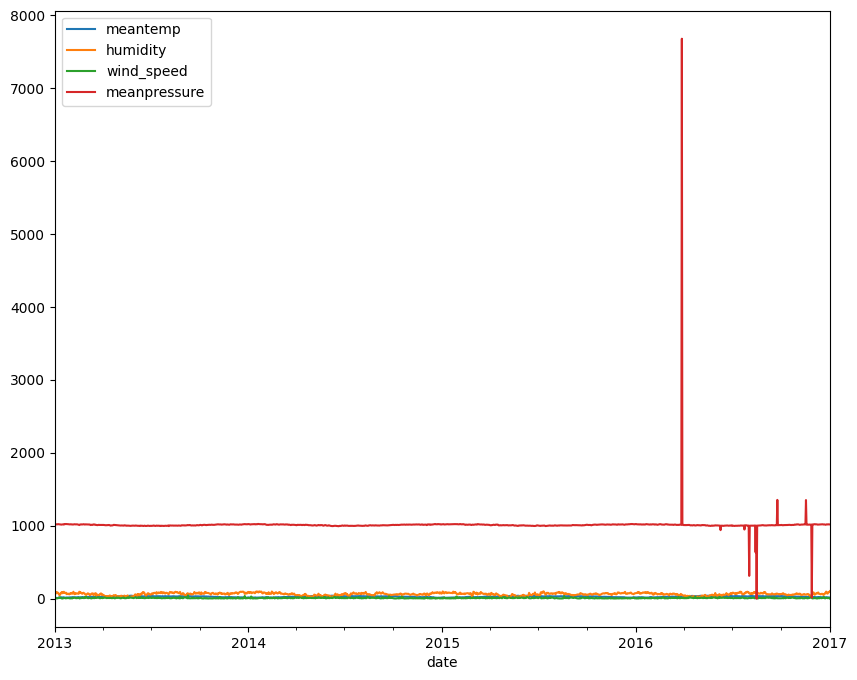

In [16]:
df_train.plot(figsize=(10, 8))
plt.show()

**Decomposition of Time Series**


Time Series Decomposition for: meantemp
----------------------------------------


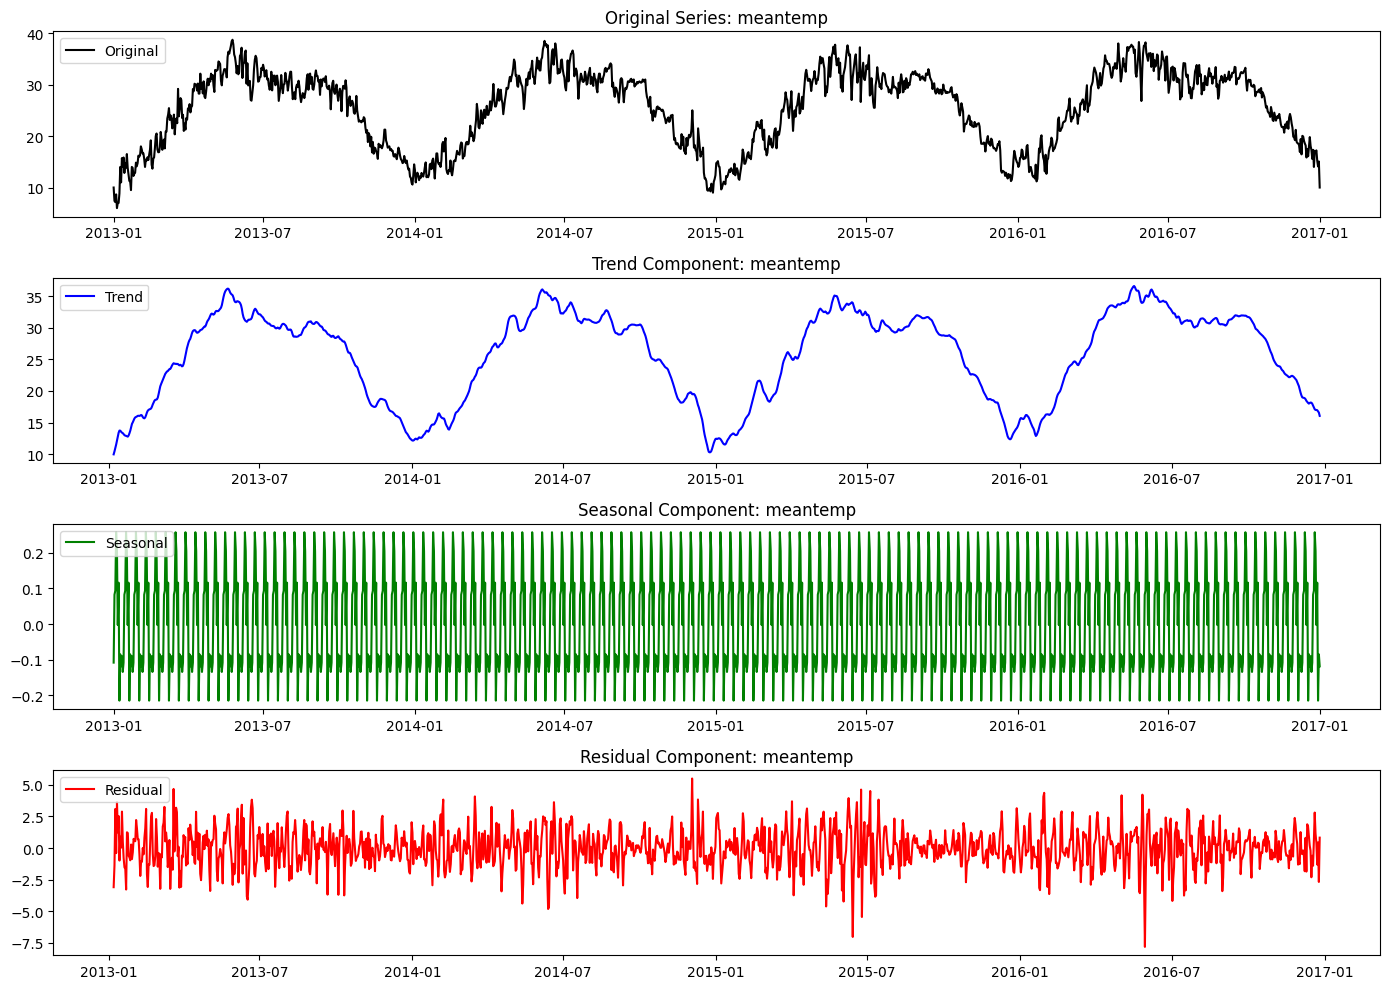


Time Series Decomposition for: humidity
----------------------------------------


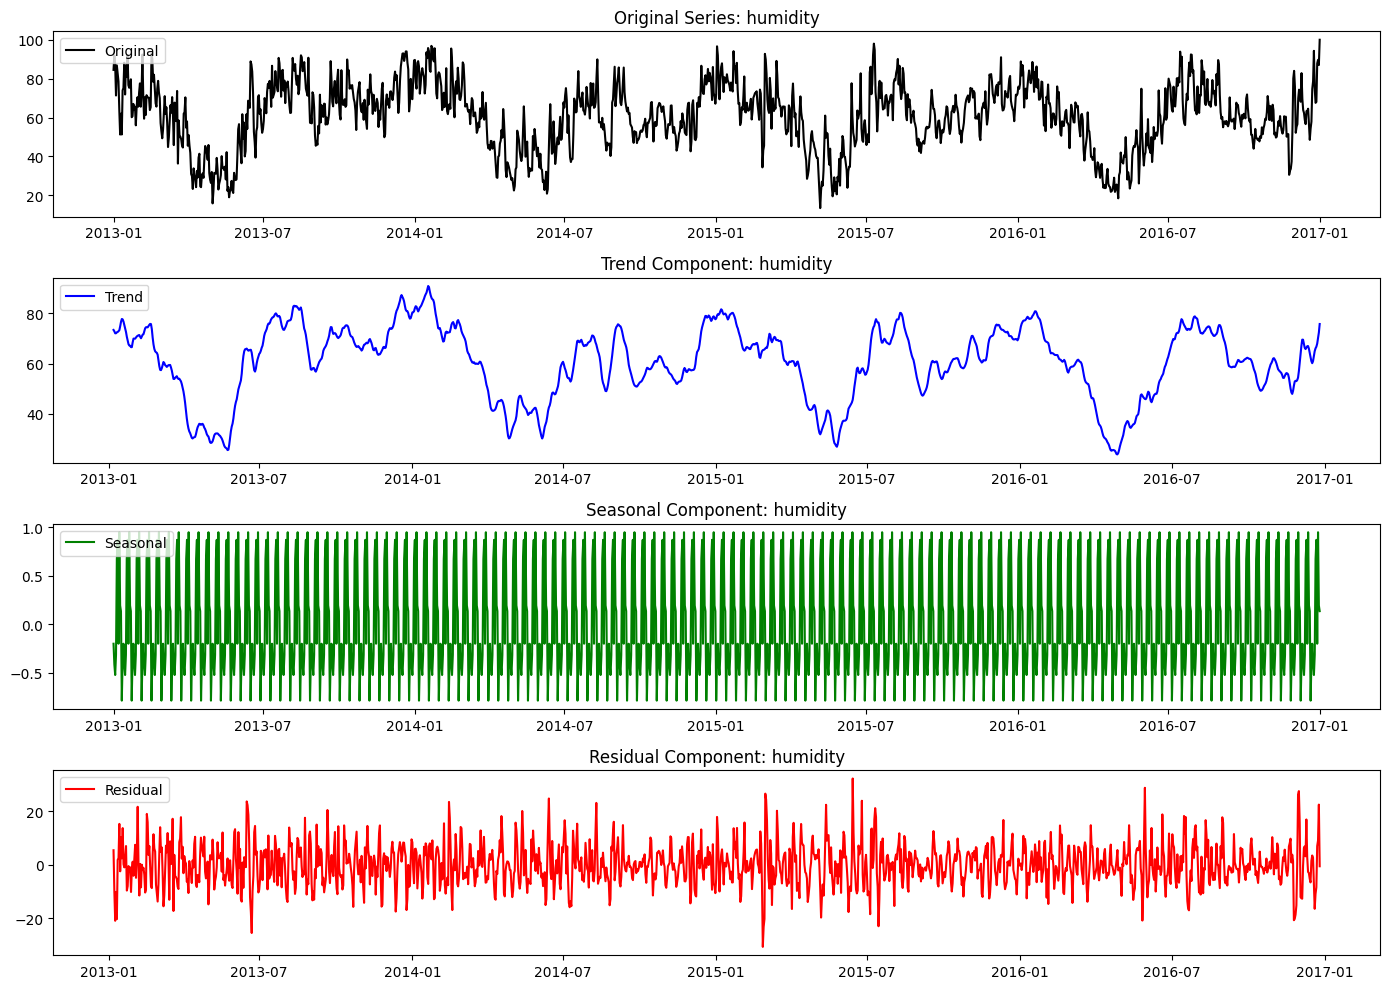


Time Series Decomposition for: wind_speed
----------------------------------------


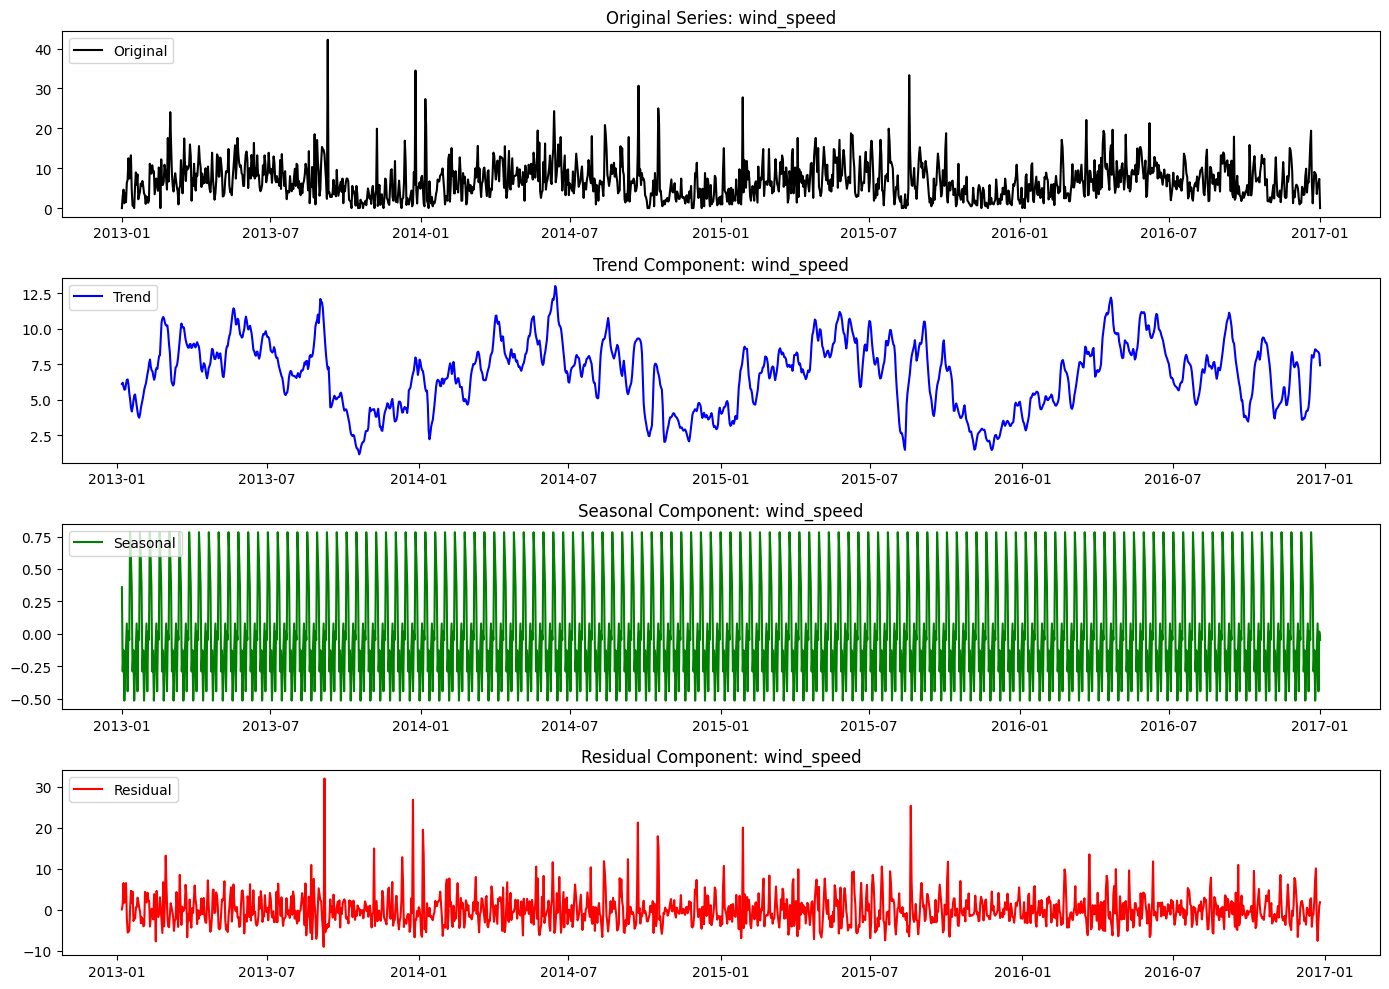


Time Series Decomposition for: meanpressure
----------------------------------------


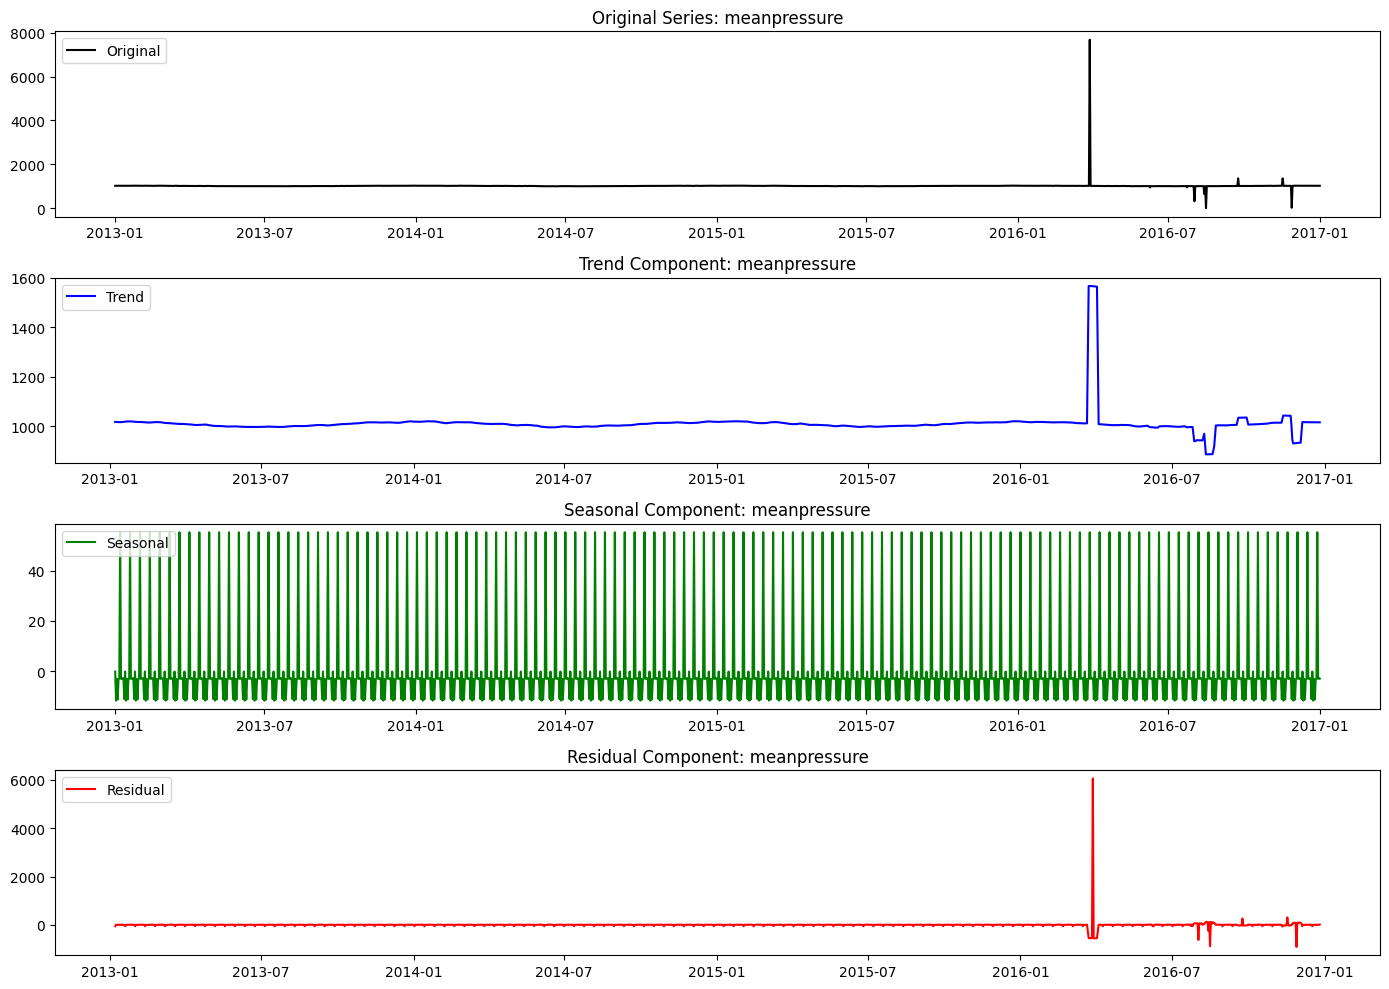

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Function to perform time series decomposition for each column
def time_series_analysis(df_train):
    for col in df_train.columns:
        # Print the column name before the plots
        print(f"\nTime Series Decomposition for: {col}\n{'-' * 40}")

        # Perform decomposition
        decomposition = seasonal_decompose(df_train[col], model='additive', period=12)

        # Extract the components
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid

        # Create a figure with subplots
        fig, axs = plt.subplots(4, 1, figsize=(14, 10))

        # Plot the original series
        axs[0].plot(df_train.index, df_train[col], label='Original', color='black')
        axs[0].set_title(f'Original Series: {col}')
        axs[0].legend(loc='upper left')

        # Plot the trend
        axs[1].plot(df_train.index, trend, label='Trend', color='blue')
        axs[1].set_title(f'Trend Component: {col}')
        axs[1].legend(loc='upper left')

        # Plot the seasonal component
        axs[2].plot(df_train.index, seasonal, label='Seasonal', color='green')
        axs[2].set_title(f'Seasonal Component: {col}')
        axs[2].legend(loc='upper left')

        # Plot the residual component
        axs[3].plot(df_train.index, residual, label='Residual', color='red')
        axs[3].set_title(f'Residual Component: {col}')
        axs[3].legend(loc='upper left')

        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()

# Perform time series analysis for each column in the DataFrame
time_series_analysis(df_train)


**Univariate Analysis**

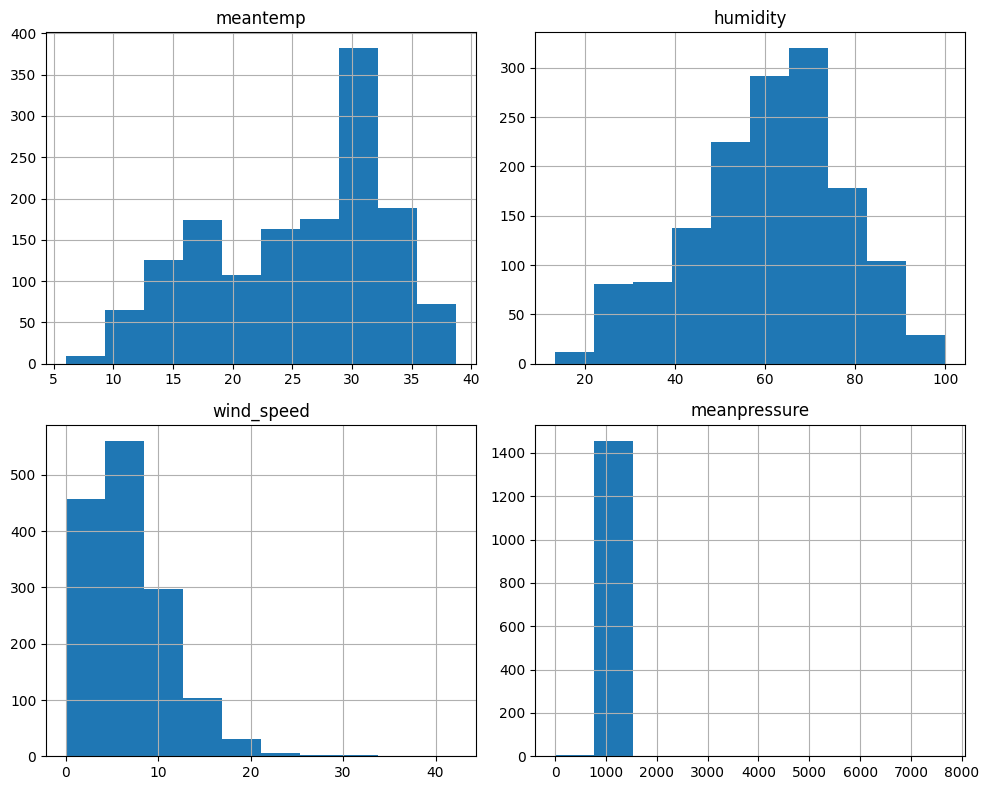

In [18]:
numerical_data = df_train.select_dtypes(include='number')

numerical_data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

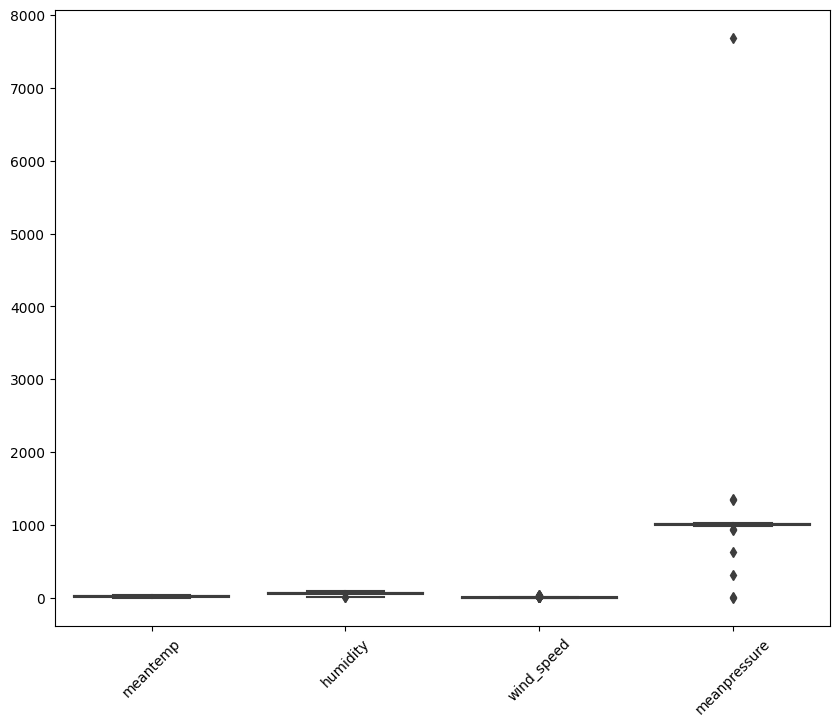

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.xticks(rotation=45)
plt.show()

**Multivariate Analysis**

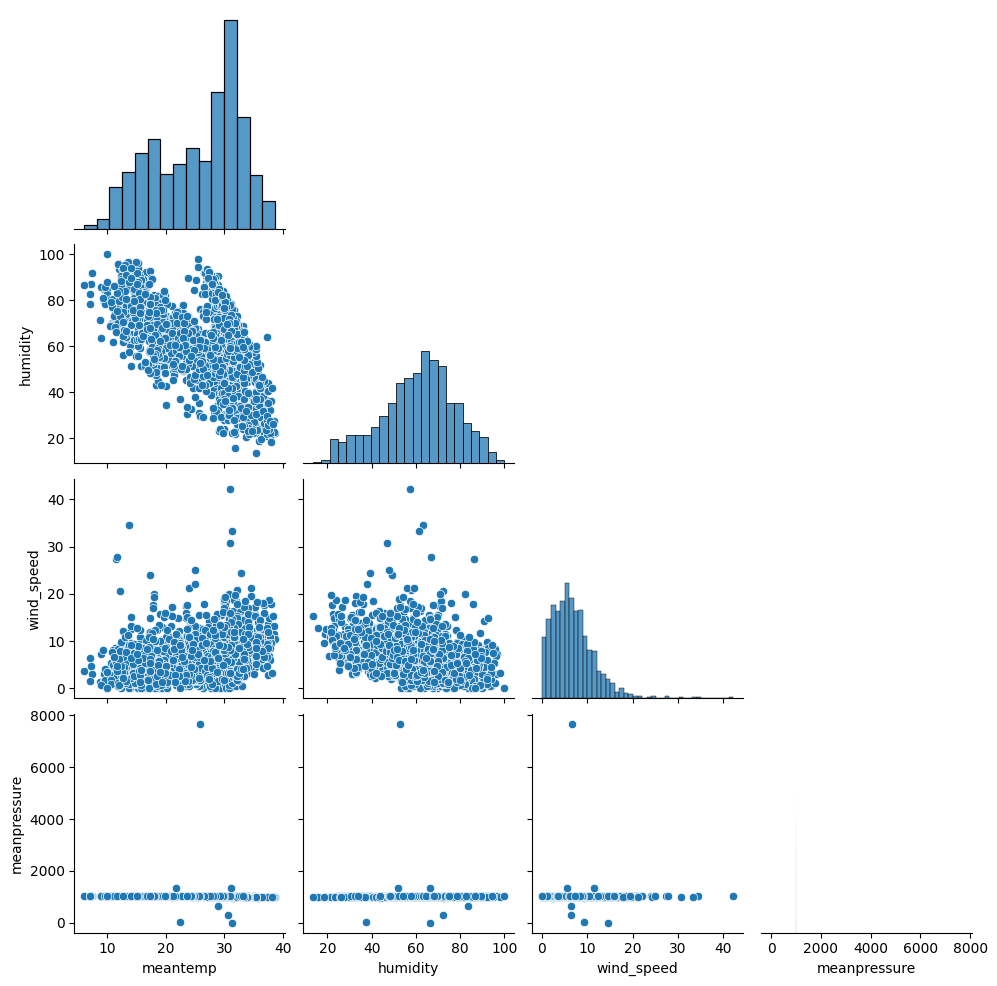

In [20]:
sns.pairplot(df_train,corner = True)
plt.show()

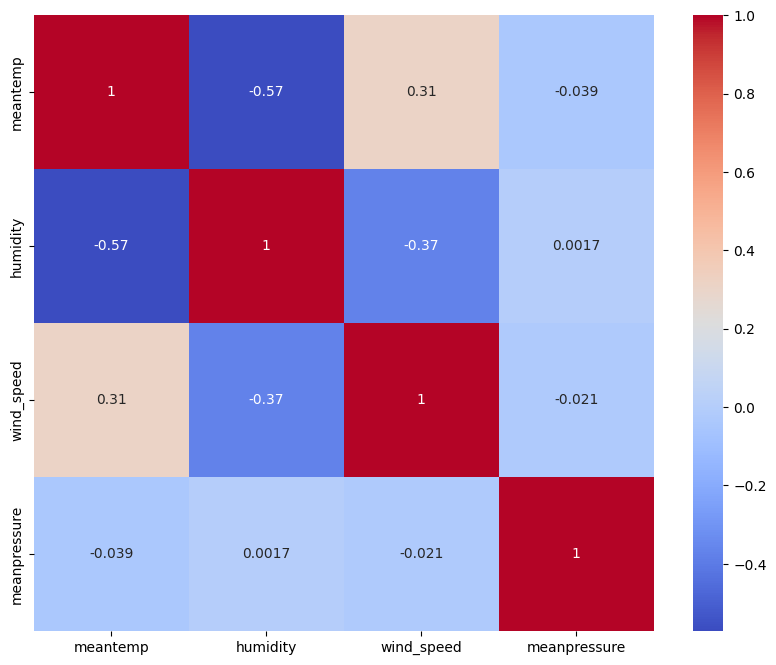

In [21]:
corr = df_train.select_dtypes(exclude=['object']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

# **Data Preprocessing**
---

**Normalizing Data**

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
df_train = scaler.fit_transform(df_train)
df_test= scaler.transform(df_test)

**Create Sequences**

In [23]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps, 0])  # Predicting the next temperature
    return np.array(X), np.array(y)

# Example with 7 time steps
n_steps = 60
X_train, y_train = create_sequences(df_train, n_steps)
X_test, y_test = create_sequences(df_test, n_steps)

# **Modeling**
-----

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

# Define the model
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 59, 64)         │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 29, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1856)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │        92,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,477 (365.14 KB)

 Trainable params: 93,477 (365.14 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
ES = EarlyStopping(monitor='mse', patience=10, restore_best_weights=True, mode = 'min')
RL = ReduceLROnPlateau(monitor='mse', factor=0.2, patience=5, min_lr=1e-6, mode = 'min')

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32,callbacks=[ES,RL])

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0904 - val_loss: 0.0102 - learning_rate: 0.0010
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - val_loss: 0.0140 - learning_rate: 0.0010
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - val_loss: 0.0104 - learning_rate: 0.0010
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - val_loss: 0.0107 - learning_rate: 0.0010
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0096 - learning_rate: 0.0010
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0113 - val_loss: 0.0098 - learning_rate: 0.0010
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - val_loss: 0.0110 - learning_rate: 0.0010
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - val_loss: 0.0127 - learning_rate: 0.0010
Epoch 9/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0094 - learning_rate: 0.0010
Epoch 10/50
44/44 ━━━━━━━━━

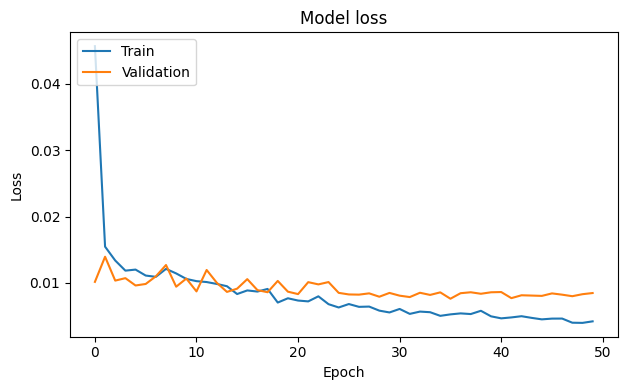

In [26]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# **Prediction**
----

In [27]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions on the test set
predictions = model.predict(X_test)

# Reshape predictions and y_test if necessary to match dimensions
predictions = predictions.flatten()  # Flatten if predictions are 2D
y_test = y_test.flatten()

# Calculate additional regression metrics
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

# Print the calculated metrics
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 
Test Loss: 0.00847941730171442
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
R-squared: 0.634625056034942
Mean Absolute Error (MAE): 0.07611217307062572
Mean Squared Error (MSE): 0.008479416558590106
